<a href="https://colab.research.google.com/github/saeedabi1/Deep_Learning_CMPE_258/blob/master/assignment_1_a_Creating_your_own_dataset_from_Google_Images_lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning - Mirsaeid Abolghassemi
#White Giraffes - Affrican Girrafe - Toy Girrafe

In [0]:
from fastai.vision import *

In [0]:
classes = ['toys','affrican','white']

In [0]:
#Create directory and upload urls file into your server¶
folder = 'white'
file = 'urls_white.csv'

In [0]:
path = Path('data/giraffes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

#Download images¶
download_images(path/file, dest, max_pics=200)


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
folder = 'toys'
file = 'urls_toys.csv'

In [0]:
path = Path('data/giraffes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
folder = 'affrican'
file = 'urls_affrican.csv'

In [0]:
path = Path('data/giraffes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

#dest = path/file
#dest.touch()
download_images(path/file, dest, max_pics=200)


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
path.ls()

[PosixPath('data/giraffes/.DS_Store'),
 PosixPath('data/giraffes/toys'),
 PosixPath('data/giraffes/urls_affrican.csv'),
 PosixPath('data/giraffes/urls_toys.csv'),
 PosixPath('data/giraffes/affrican'),
 PosixPath('data/giraffes/white'),
 PosixPath('data/giraffes/urls_white.csv')]

In [0]:
#classes = ['toys','affrican','white']

In [0]:
#file = 'whiteGiraffeImageFile.csv'
#download_images(path/file, dest, max_pics=200, max_workers=0)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

toys


affrican


white


In [0]:
#View data
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['affrican', 'toys', 'white']

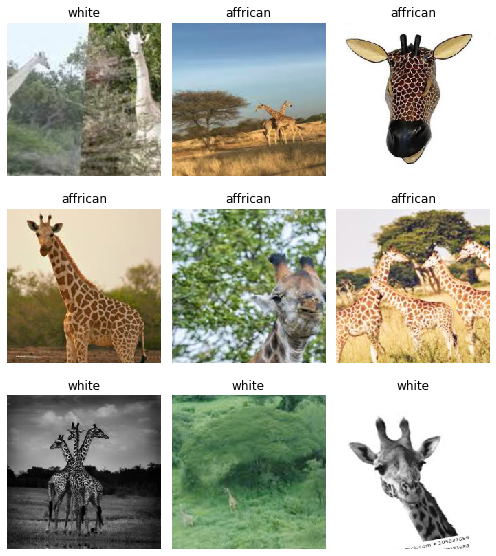

In [0]:
data.show_batch(rows=3, figsize=(7,8))


In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)


(['affrican', 'toys', 'white'], 3, 368, 92)

In [0]:
#Train model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/mirsaeidabolghasemi/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.861964,0.708494,0.206522,01:13
1,1.298287,0.551642,0.119565,01:11
2,0.992307,0.476749,0.097826,01:10
3,0.823731,0.441782,0.086957,01:10


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


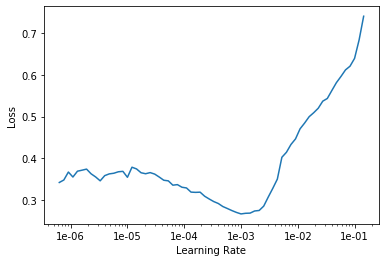

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.407841,0.434493,0.108696,01:40
1,0.349306,0.480731,0.130435,01:39


In [0]:
learn.save('stage-2')

In [0]:
#Interpretation
learn.load('stage-2');


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


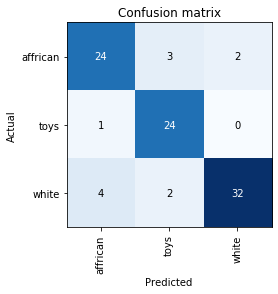

In [0]:
interp.plot_confusion_matrix()


In [0]:
#Cleaning Up¶
from fastai.widgets import *


In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


In [0]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [0]:
#Putting your model in production
learn.export()


In [0]:
defaults.device = torch.device('cpu')


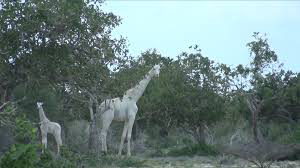

In [0]:
img = open_image(path/'white'/'00000016.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category white

In [0]:
#Learning rate (LR) too high¶
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [0]:
learn.fit_one_cycle(1, max_lr=0.5)


epoch,train_loss,valid_loss,error_rate,time
0,18.433945,2228916992.000000,0.728261,01:14


In [0]:
#Learning rate (LR) too low¶
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)


epoch,train_loss,valid_loss,error_rate,time
0,2.109865,1.881553,0.717391,01:17
1,2.104588,1.760827,0.760870,01:15
2,2.023574,1.665746,0.750000,01:13
3,2.033285,1.624063,0.750000,01:14
4,2.017712,1.608699,0.717391,01:13


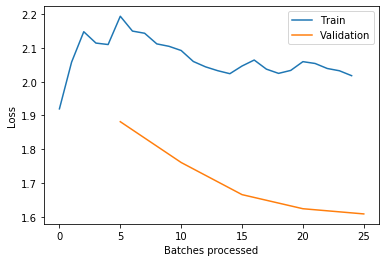

In [0]:
learn.recorder.plot_losses()


In [0]:
#Too few epochs¶
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)


In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.837290,8.233964,0.586957,01:48


In [0]:
#Too many epochs
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /Users/mirsaeidabolghasemi/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))


epoch,train_loss,valid_loss,error_rate,time
0,1.317708,1.416842,0.606280,01:13
1,1.366357,1.354576,0.594203,01:14
2,1.330009,1.291974,0.557971,01:08
3,1.338113,1.230656,0.528986,01:13
4,1.306768,1.178251,0.519324,01:15
5,1.228935,1.100836,0.485507,01:17
6,1.172372,1.037151,0.461353,01:08
7,1.121944,0.978540,0.451691,01:08
8,1.040665,0.932633,0.429952,01:10
9,0.959678,0.903090,0.405797,01:10
